In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [2]:
pop_count = pd.read_csv('../Population Map/data_eda/df_cairo.csv')

In [3]:
pop_count.head()

,population_total,population_man,population_woman,population_woman_rep,population_children,population_youth,population_elder,latitude,longitude
0,NaN,18.134275,16.772508,9.13111,4.265945,8.046592,1.395677,29.800139,31.234861
1,35.15864,NaN,NaN,NaN,NaN,NaN,NaN,29.800139,31.236250
2,35.15864,NaN,NaN,NaN,NaN,NaN,NaN,29.800139,31.237361
3,35.15864,NaN,NaN,NaN,NaN,NaN,NaN,29.800139,31.238472
4,35.15864,18.134275,16.772508,9.13111,4.265945,8.046592,1.395677,29.800139,31.238750


In [4]:
pop_count.rename(columns = {'latitude': 'Longitude', 'longitude': 'Latitude'}, inplace = True)

In [5]:
pop_count_large = pd.read_csv('../Population Map/data_eda/df_cairo_large.csv')

In [6]:
realestate = pd.read_csv('../CSVs/coord_no_zeros.csv')

# Using Matplotlib - Extended

In [7]:
realestate = realestate.loc[(realestate['lat'] > 29.95) & 
                  (realestate['lat'] < 30.15) & 
                  (realestate['lon'] > 31.2) & 
                  (realestate['lon'] < 31.7)]

In [8]:
df_house = realestate.loc[(realestate['lat'] > 29.8) & 
                  (realestate['lat'] < 30.2) & 
                  (realestate['lon'] > 31.1) & 
                  (realestate['lon'] < 31.4)]

In [9]:
df_pop = pop_count.loc[(pop_count['Longitude'] > 29.95) & 
                       (pop_count['Longitude'] < 30.13) & 
                       (pop_count['Latitude'] > 31.15) & 
                       (pop_count['Latitude'] < 31.4)]

In [10]:
house_low = df_house.loc[(df_house['base_price'] > 1) & (df_house['base_price'] <= 2.500000e+04)]
house_high = df_house.loc[df_house['base_price'] > 2.500000e+04]

In [11]:
# latitude 
slum_lat = [30.0362,30.0666667,30.0833333,31.3,30.0711,30.0011,30.0645,30.1286111]
slum_lat_plot = [i for i in slum_lat if (i > 29.8) & (i < 30.2)]

# longitude
slum_lon = [31.2783,31.3,31.2166667,30.93,31.2300,31.2316,31.3816,31.2422222]
slum_lon_plot = [i for i in slum_lon if (i > 31.1) & (i < 31.4)]

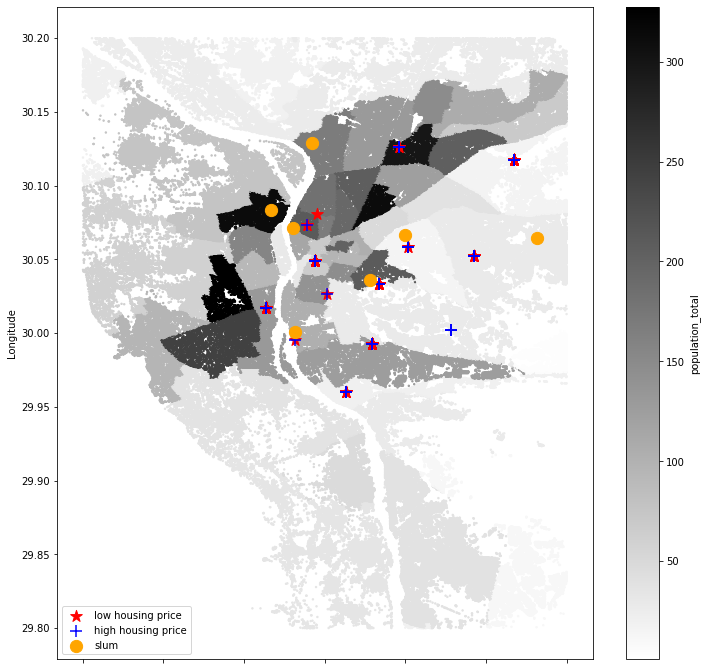

In [12]:
# total population
pop_count.plot(kind = 'scatter', 
        y = 'Longitude', 
        x = 'Latitude', 
        c = 'population_total',
        cmap = 'binary', 
        figsize = (12,12), 
        s = 2)

# plt.figure(figsize = (8,8))

# housing price
plt.scatter(y = house_low['lat'], 
            x = house_low['lon'], 
            cmap = 'binary',
            marker = "*", 
            c = 'r',
            label = 'low housing price', 
            s =150)

plt.scatter(y = house_high['lat'], 
            x = house_high['lon'], 
            cmap = 'binary',
            marker = "+", 
            c = 'b',
            label = 'high housing price', 
            s =150)


# slum area
plt.scatter(y = slum_lat_plot, 
            x = slum_lon_plot, 
            cmap = 'gist_yarg', 
            marker = 'o',
            s = 150, 
            c = 'orange', 
            label = 'slum')

plt.legend();

In [13]:
df_house.describe()

,base_price,price_usd,lat,lon
count,1.702000e+03,1.702000e+03,1702.000000,1702.000000
mean,1.284409e+06,2.020375e+07,30.048801,31.279612
std,3.361410e+06,5.287499e+07,0.043160,0.050928
min,1.000000e+03,1.573000e+04,29.960331,31.213451
25%,2.400000e+04,3.775200e+05,30.017004,31.243666
50%,5.000000e+04,7.865000e+05,30.048819,31.279392
75%,4.312500e+05,6.783562e+06,30.056717,31.301586
max,4.059000e+07,6.384807e+08,30.126218,31.367206


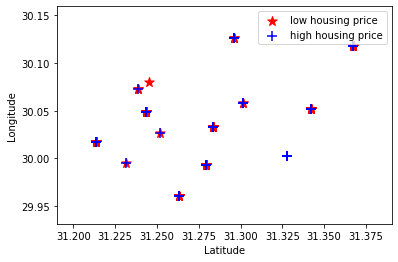

In [14]:
plt.scatter(y = house_low['lat'], 
            x = house_low['lon'], 
            cmap = 'binary',
            marker = "*", 
            c = 'r',
            label = 'low housing price', 
            s =100)

plt.scatter(y = house_high['lat'], 
            x = house_high['lon'], 
            cmap = 'binary',
            marker = "+", 
            c = 'b',
            label = 'high housing price', 
            s =100)

plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Longitude');

In [15]:
house_low_large = realestate.loc[(realestate['base_price'] > 1) & (df_house['base_price'] <= 2.500000e+04)]
house_high_large = realestate.loc[realestate['base_price'] > 2.500000e+04]

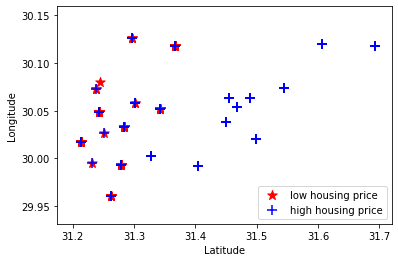

In [16]:
plt.scatter(y = house_low_large['lat'], 
            x = house_low_large['lon'], 
            cmap = 'binary',
            marker = "*", 
            c = 'r',
            label = 'low housing price', 
            s =100)

plt.scatter(y = house_high_large['lat'], 
            x = house_high_large['lon'], 
            cmap = 'binary',
            marker = "+", 
            c = 'b',
            label = 'high housing price', 
            s =100)

plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Longitude');

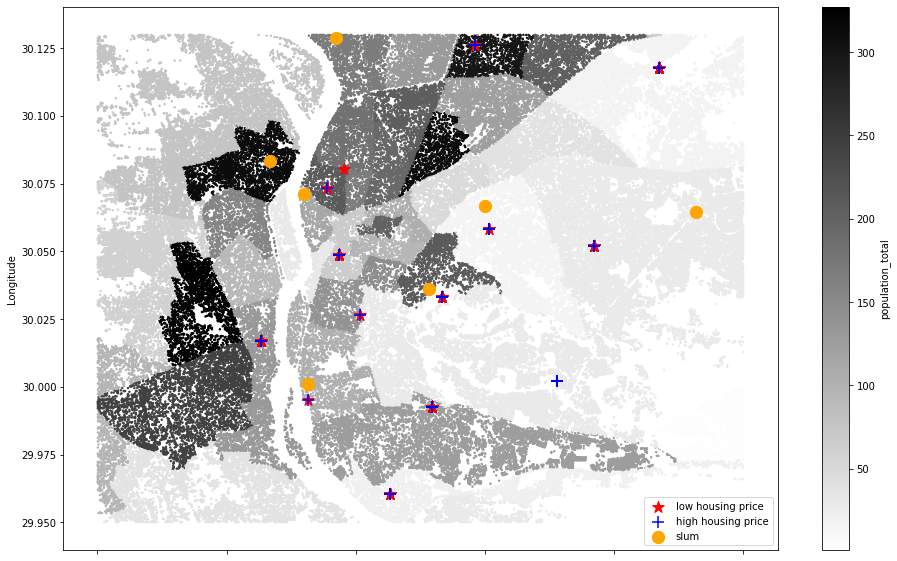

In [17]:
# total population
df_pop.plot(kind = 'scatter', 
        y = 'Longitude', 
        x = 'Latitude', 
        c = 'population_total',
        cmap = 'binary', 
        figsize = (16,10), 
        s = 2)


# housing price
plt.scatter(y = house_low['lat'], 
            x = house_low['lon'], 
            cmap = 'binary',
            marker = "*", 
            c = 'r',
            label = 'low housing price', 
            s =150)

plt.scatter(y = house_high['lat'], 
            x = house_high['lon'], 
            cmap = 'binary',
            marker = "+", 
            c = 'b',
            label = 'high housing price', 
            s =150)


# slum area
plt.scatter(y = slum_lat_plot, 
            x = slum_lon_plot, 
            cmap = 'gist_yarg', 
            marker = 'o', 
            s = 150, 
            c = 'orange', 
            label = 'slum')

plt.legend();